<a href="https://colab.research.google.com/github/gabriellavinco/Soccer_Analysis_1/blob/main/MetricaBasicAnalysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/seidlr/LaurieOnTracking.git

  Cloning https://github.com/seidlr/LaurieOnTracking.git to /tmp/pip-req-build-2r7h6lck
  Running command git clone -q https://github.com/seidlr/LaurieOnTracking.git /tmp/pip-req-build-2r7h6lck
  Created wheel for FriendsOfTracking: filename=FriendsOfTracking-0.1.dev0-cp36-none-any.whl size=15340 sha256=bd87d30a0a47ff00c8103a7ae2088c5bae21e4360082ca58945923053ce741cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-jw0xw31_/wheels/4f/da/b9/b5da2ac87d3faaf52e046cb0cafe6e2221e1518b1e3e3c04d5
Successfully built FriendsOfTracking


# FIRST SOCCER ANALYSIS: GK Tracking


In [73]:
import friendsoftracking.metrica.IO as mio
import friendsoftracking.metrica.Viz as mviz

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

In [74]:
game_id = 2 # let's look at sample match 2

# read in the event data
events = mio.read_event_data(game_id)
events.head(20)

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
5,Away,PASS,NaN,1,395,15.80,423,16.92,Player16,Player15,0.26,0.66,0.27,0.91
6,Away,BALL LOST,INTERCEPTION,1,451,18.04,504,20.16,Player15,NaN,0.26,0.92,0.64,0.93
7,Away,CHALLENGE,GROUND-LOST,1,504,20.16,504,20.16,Player23,NaN,0.61,0.93,NaN,NaN
8,Home,CHALLENGE,GROUND-WON,1,504,20.16,504,20.16,Player3,NaN,0.62,0.92,NaN,NaN
9,Home,RECOVERY,INTERCEPTION,1,504,20.16,504,20.16,Player3,NaN,0.62,0.92,NaN,NaN


In [75]:
events["Type"].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

In [76]:
# metrica units to meters with origin at the center point
events = mio.to_metric_coordinates(events)

# Get events by team (Home/Away)
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

# Frequency of each event type by team
home_events['Type'].value_counts()
away_events['Type'].value_counts()

# Get all shots
shots = events[events['Type']=='SHOT']
home_shots = home_events[home_events.Type=='SHOT']
away_shots = away_events[away_events.Type=='SHOT']

# Look at frequency of each shot Subtype
print(home_shots['Subtype'].value_counts())
print()
print(away_shots['Subtype'].value_counts())
print()
# Look at the number of shots taken by each home player
print( home_shots['From'].value_counts() )

ON TARGET-SAVED        4
HEAD-OFF TARGET-OUT    4
ON TARGET-GOAL         2
OFF TARGET-OUT         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64

OFF TARGET-OUT         3
ON TARGET-SAVED        2
BLOCKED                2
ON TARGET-GOAL         2
OFF TARGET-HEAD-OUT    1
HEAD-OFF TARGET-OUT    1
Name: Subtype, dtype: int64

Player9     4
Player10    3
Player5     2
Player7     1
Player4     1
Player12    1
Player3     1
Name: From, dtype: int64


In [90]:
# Basic match statistics (shots/saves/save pct.)
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')]
home_final_score = home_goals["Subtype"].count()
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')]
away_final_score = away_goals["Subtype"].count()
# print(home_goals)
# print(away_goals)
# print()

print("FINAL SCORE")
print("HOME:", home_final_score, "AWAY:", away_final_score)
print()

home_saves = home_events[home_events.Subtype =="ON TARGET-SAVED"]
home_saves_ct = home_saves['Subtype'].count()
away_saves = away_events[away_events.Subtype =="ON TARGET-SAVED"]
away_saves_ct = away_saves['Subtype'].count()
print("HOME ON TARGET SAVES:",home_saves_count)
print()
print("AWAY ON TARGET SAVES:",away_saves_count)
print()

total_home_shots = home_shots['Type'].count()
total_away_shots = away_shots["Type"].count()
home_on_target_shots = home_shots[home_shots['Subtype'].str.contains('ON')]
home_on_target_shots_ct = home_on_target_shots["Subtype"].count()
away_on_target_shots = away_shots[away_shots['Subtype'].str.contains('ON')]
away_on_target_shots_ct = away_on_target_shots["Subtype"].count()
home_off_target_shots = home_shots[home_shots['Subtype'].str.contains('OFF' or "BLOCKED")]
home_off_target_shots_ct = home_off_target_shots["Subtype"].count()
away_off_target_shots = away_shots[away_shots['Subtype'].str.contains('OFF' or "BLOCKED")]
away_off_target_shots_ct = away_off_target_shots["Subtype"].count()
print("TOTAL HOME SHOTS (ON/OFF TARGET):",home_on_target_shots_ct,"/",home_off_target_shots_ct)
print()
print("TOTAL AWAY SHOTS (ON/OFF TARGET):",away_on_target_shots_ct,"/",away_off_target_shots_ct)
print()

home_save_percent = home_saves_ct/home_on_target_shots_ct
away_save_percent = away_saves_ct/away_on_target_shots_ct
print("HOME SAVE PERCENT:", round(home_save_percent,2))
print()
print("AWAY SAVE PERCENT:", round(away_save_percent,2))

FINAL SCORE
HOME: 3 AWAY: 2

HOME ON TARGET SAVES: 4

AWAY ON TARGET SAVES: 2

TOTAL HOME SHOTS (ON/OFF TARGET): 7 / 6

TOTAL AWAY SHOTS (ON/OFF TARGET): 4 / 5

HOME SAVE PERCENT: 0.57

AWAY SAVE PERCENT: 0.5


In [83]:
#### TRACKING DATA ####

# READING IN TRACKING DATA
tracking_home = mio.read_tracking_data(game_id, 'Home')
tracking_away = mio.read_tracking_data(game_id, 'Away')

# Look at the column namems
print( tracking_home.columns )

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

Reading team: home
Reading team: away
Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


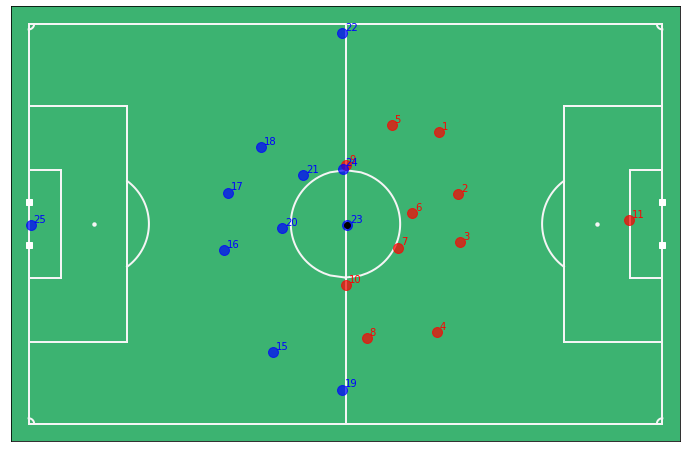

In [84]:
# player positions at kick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame], annotate=True)

In [85]:
# plot all on target shots
home_goals = home_goals.copy()
print(home_goals)
away_goals = away_goals.copy()
print(away_goals)
home_goals["Minute"] = home_goals["Start Time [s]"]/60


      Team  Type              Subtype  Period  ...  Start Y  End X  End Y     Minute
198   Home  SHOT       ON TARGET-GOAL       1  ...    -3.40 -54.06  -2.04   8.134667
1118  Home  SHOT  HEAD-ON TARGET-GOAL       2  ...    -1.36  54.06  -2.04  49.322000
1723  Home  SHOT       ON TARGET-GOAL       2  ...    -5.44  54.06  -2.72  80.684667

[3 rows x 15 columns]
      Team  Type         Subtype  Period  ...  Start X  Start Y  End X  End Y
823   Away  SHOT  ON TARGET-GOAL       1  ...    44.52     2.72  54.06   1.36
1671  Away  SHOT  ON TARGET-GOAL       2  ...   -40.28    -1.36 -55.12  -2.72

[2 rows x 14 columns]


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fec4d84bc50>)

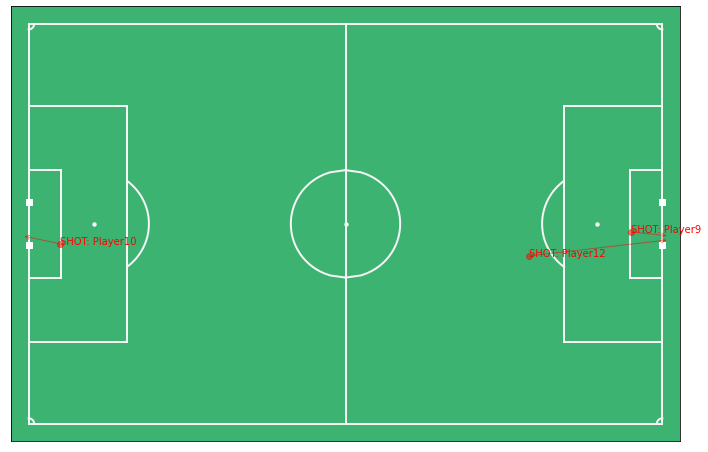

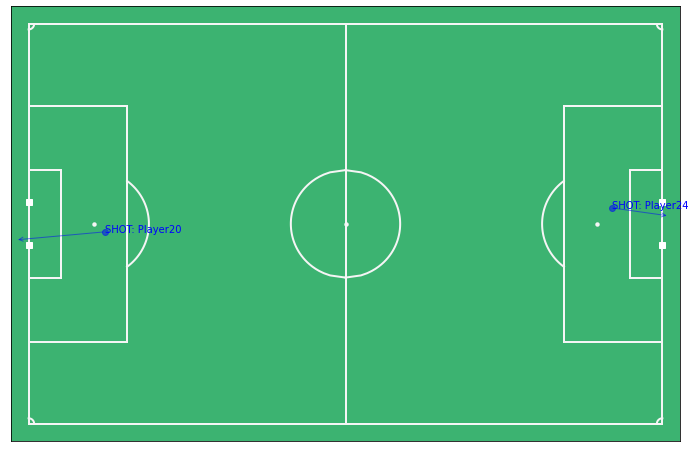

In [97]:
# plot all home goals(red) and all away goals(blue)
h_goals = home_goals.index
a_goals = away_goals.index
mviz.plot_events( events.loc[h_goals], indicators = ['Marker','Arrow'], annotate=True, color='r')
mviz.plot_events( events.loc[a_goals], indicators = ['Marker','Arrow'], annotate=True, color='b' )

In [98]:
# saved shots plotted
home_saves.copy()
away_saves.copy()
print(home_saves)
print(away_saves)

      Team  Type          Subtype  Period  ...  Start X  Start Y  End X  End Y
252   Home  SHOT  ON TARGET-SAVED       1  ...   -41.34    11.56 -48.76   0.68
472   Home  SHOT  ON TARGET-SAVED       1  ...   -31.80   -13.60 -53.00  -2.72
1479  Home  SHOT  ON TARGET-SAVED       2  ...    48.76     4.08  51.94   3.40
1927  Home  SHOT  ON TARGET-SAVED       2  ...    21.20    -1.36  50.88  -1.36

[4 rows x 14 columns]
      Team  Type          Subtype  Period  ...  Start X  Start Y  End X  End Y
980   Away  SHOT  ON TARGET-SAVED       1  ...    28.62    -3.40  51.94  -2.04
1335  Away  SHOT  ON TARGET-SAVED       2  ...   -46.64    11.56 -51.94   2.72

[2 rows x 14 columns]


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fec4d5a3fd0>)

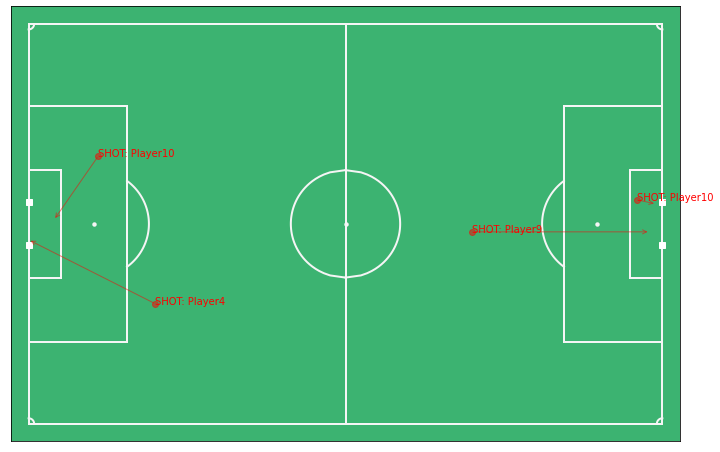

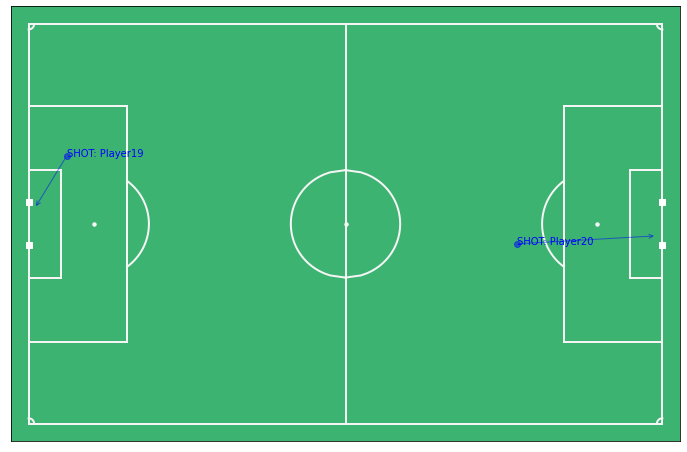

In [99]:
# plot all home saves(red) and all away saves(blue)
h_saves = home_saves.index
a_saves = away_saves.index

mviz.plot_events( events.loc[h_saves], indicators = ['Marker','Arrow'], annotate=True, color='r')
mviz.plot_events( events.loc[a_saves], indicators = ['Marker','Arrow'], annotate=True, color='b' )

In [91]:
# All shots on goal
home_on_target_shots = home_on_target_shots.copy()
away_on_target_shots = away_on_target_shots.copy()

print(home_on_target_shots)
print(away_on_target_shots)

      Team  Type              Subtype  Period  ...  Start X  Start Y  End X  End Y
198   Home  SHOT       ON TARGET-GOAL       1  ...   -47.70    -3.40 -54.06  -2.04
252   Home  SHOT      ON TARGET-SAVED       1  ...   -41.34    11.56 -48.76   0.68
472   Home  SHOT      ON TARGET-SAVED       1  ...   -31.80   -13.60 -53.00  -2.72
1118  Home  SHOT  HEAD-ON TARGET-GOAL       2  ...    47.70    -1.36  54.06  -2.04
1479  Home  SHOT      ON TARGET-SAVED       2  ...    48.76     4.08  51.94   3.40
1723  Home  SHOT       ON TARGET-GOAL       2  ...    30.74    -5.44  54.06  -2.72
1927  Home  SHOT      ON TARGET-SAVED       2  ...    21.20    -1.36  50.88  -1.36

[7 rows x 14 columns]
      Team  Type          Subtype  Period  ...  Start X  Start Y  End X  End Y
823   Away  SHOT   ON TARGET-GOAL       1  ...    44.52     2.72  54.06   1.36
980   Away  SHOT  ON TARGET-SAVED       1  ...    28.62    -3.40  51.94  -2.04
1335  Away  SHOT  ON TARGET-SAVED       2  ...   -46.64    11.56 -51.94   2.

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fec4d573048>)

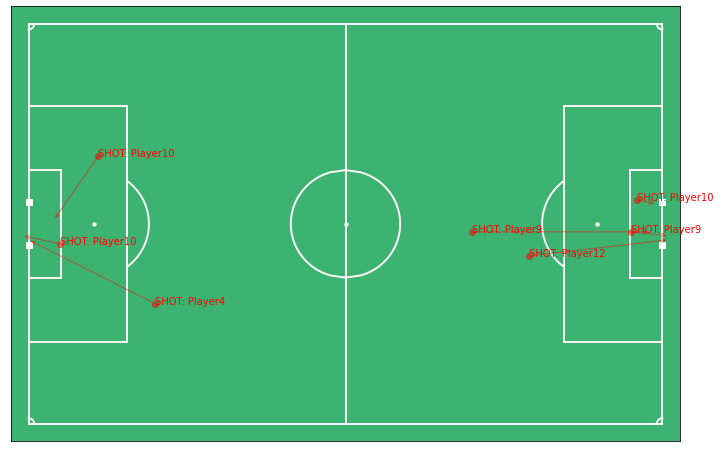

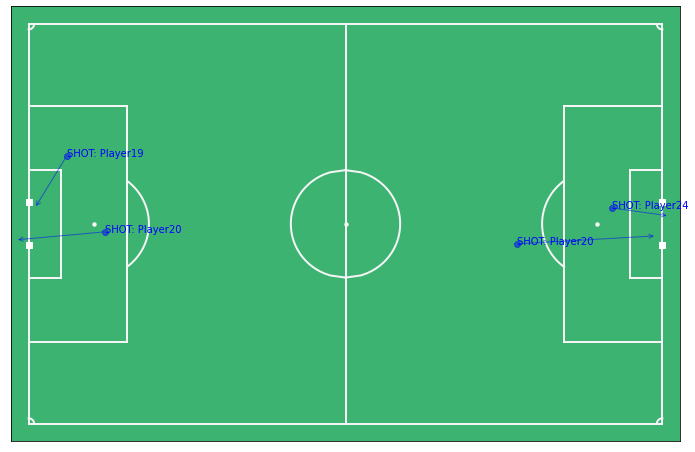

In [96]:
# plot all home shots on goal(red) and all away shots on goal(blue)
h_goals = home_on_target_shots.index
a_goals = away_on_target_shots.index

mviz.plot_events( events.loc[h_goals], indicators = ['Marker','Arrow'], annotate=True, color='r')
mviz.plot_events( events.loc[a_goals], indicators = ['Marker','Arrow'], annotate=True, color='b' )